In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import gdown 
from pandas.plotting import scatter_matrix


#### Reading solar farm data

In [4]:
# Download and read benin solar farm dataset
gdown.download("https://drive.google.com/uc?id=1YEMWlwjHTJPpvpraHmdXGI_Hcihslv-r", output='../data/benin-dataset.csv', quiet=False)
benin_df = pd.read_csv("../data/benin-dataset.csv")

# Download and read sierraleone farm dataset
gdown.download("https://drive.google.com/uc?id=1ba6tx51buPA4R7jJrkNMfmjGyZ3wOrw5", output="../data/sierraleone-dataset.csv", quiet=False)
sierraleone_df = pd.read_csv("../data/sierraleone-dataset.csv")

# Download and read togo solar farm dataset
gdown.download("https://drive.google.com/uc?id=1jEtxsgACzSdj6gQjG102gKZnZILHvIz8", output="../data/togo-dataset.csv", quiet=False)
togo_df = pd.read_csv("../data/togo-dataset.csv")


Downloading...
From: https://drive.google.com/uc?id=1YEMWlwjHTJPpvpraHmdXGI_Hcihslv-r
To: /Users/yo/Documents/solar-farm-eda-and-statistical-analysis/data/benin-dataset.csv
100%|██████████| 46.8M/46.8M [00:05<00:00, 7.88MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ba6tx51buPA4R7jJrkNMfmjGyZ3wOrw5
To: /Users/yo/Documents/solar-farm-eda-and-statistical-analysis/data/sierraleone-dataset.csv
100%|██████████| 46.0M/46.0M [00:06<00:00, 7.62MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jEtxsgACzSdj6gQjG102gKZnZILHvIz8
To: /Users/yo/Documents/solar-farm-eda-and-statistical-analysis/data/togo-dataset.csv
100%|██████████| 49.9M/49.9M [00:07<00:00, 6.46MB/s]


In [5]:
benin_df.head(3)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN


In [6]:
sierraleone_df.head(3)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [7]:
togo_df.head(3)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN


#### Summary Statistics

In [8]:
# Calculating statistical measures and informations for Benin dataset
benin_df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [9]:
# Calculating statistical measures and informations for Sierra Leone dataset
sierraleone_df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [10]:
# Calculating statistical measures and informations for Togo dataset
togo_df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


#### Data Quality Check

**Checking for Missing Values**

In [11]:
# Missing values in Benin dataset
benin_df.isnull().sum()[benin_df.isnull().sum() > 0]

Comments    525600
dtype: int64

In [12]:
# Missing values in Sierra Leone dataset
sierraleone_df.isnull().sum()[sierraleone_df.isnull().sum() > 0]

Comments    525600
dtype: int64

In [13]:
# Missing values in Togo dataset
togo_df.isnull().sum()[togo_df.isnull().sum() > 0]

Comments    525600
dtype: int64

**Checking for outliers**

In [14]:
# Checking for outliers with IQR method
def detect_outlier_iqr(df: pd.DataFrame): 
    outlier_col = {}
    for col in df.select_dtypes('number'):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Get the outliers
        outlier_col[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outlier_col

# Outliers in Benin dataset
print("Outliers in Benin dataset: ", detect_outlier_iqr(benin_df))
# Outliers in Sierra Leone dataset
print("Outliers in Sierra Leone dataset: ", detect_outlier_iqr(sierraleone_df))
# Outliers in Togo dataset
print("Outliers in Togo dataset: ", detect_outlier_iqr(togo_df))


Outliers in Benin dataset:  {'GHI': 671       1274.0
674       1349.0
676       1334.0
849       1253.0
850       1324.0
           ...  
522046    1218.0
522067    1218.0
522073    1218.0
522074    1262.0
522075    1289.0
Name: GHI, Length: 145, dtype: float64, 'DNI': 850       813.0
868       791.9
869       791.8
870       802.0
871       792.5
          ...  
523540    796.4
523541    798.6
523542    797.0
523543    794.6
523553    786.3
Name: DNI, Length: 15196, dtype: float64, 'DHI': 668       554.9
669       583.3
670       610.6
671       615.2
672       612.8
          ...  
524921    554.7
524937    546.3
524938    544.3
524964    545.4
524965    546.6
Name: DHI, Length: 8733, dtype: float64, 'ModA': 671       1210.3
674       1281.5
676       1267.3
850       1218.0
5019      1271.0
           ...  
514922    1182.0
517777    1163.0
520659    1168.0
522074    1166.0
522075    1191.0
Name: ModA, Length: 98, dtype: float64, 'ModB': 671       1210.3
674       1281.5
676       1

** Checking Incorrect Entries**

In [15]:
# Checking all have numeric data types 
print('Non numeric datatype in Benin dataset: ', benin_df.select_dtypes('object').columns)
print('Non numeric datatype in Sierra Leon dataset: ', sierraleone_df.select_dtypes('object').columns)
print('Non numeric datatype in Togo dataset: ', togo_df.select_dtypes('object').columns)

Non numeric datatype in Benin dataset:  Index(['Timestamp'], dtype='object')
Non numeric datatype in Sierra Leon dataset:  Index(['Timestamp'], dtype='object')
Non numeric datatype in Togo dataset:  Index(['Timestamp'], dtype='object')


In [16]:
# Checking for Out-of-range values
def detect_out_of_range(df: pd.DataFrame):
    out_of_range = {}
    for col in df.select_dtypes('number'):
        count = df[(df[col] < 0)][col].count() 
        if count > 0:
            out_of_range[col] = df[(df[col] < 0)][col].count() / df.shape[0] * 100
    return out_of_range

# Out-of-range values in Benin dataset
print("Out-of-range values in Benin dataset in %: ", detect_out_of_range(benin_df))
# Out-of-range values in Sierra Leone dataset
print("Out-of-range values in Sierra Leone dataset in %: ", detect_out_of_range(sierraleone_df))
# Out-of-range values in Togo dataset
print("Out-of-range values in Togo dataset in %: ", detect_out_of_range(togo_df))

Out-of-range values in Benin dataset in %:  {'GHI': np.float64(49.247907153729074), 'DNI': np.float64(52.50894216133942), 'DHI': np.float64(49.31164383561644)}
Out-of-range values in Sierra Leone dataset in %:  {'GHI': np.float64(49.6832191780822), 'DNI': np.float64(50.67579908675799), 'DHI': np.float64(50.06240487062404)}
Out-of-range values in Togo dataset in %:  {'GHI': np.float64(48.96974885844749)}


In [17]:

# Identify duplicate
# Identify duplicate rows in Benin dataset
print('Duplicat columns in benin dataset: ', benin_df.duplicated().sum())
# Identify duplicate rows in Sierra Leone dataset
print('Duplicat columns in sierraleone dataset: ', sierraleone_df.duplicated().sum())
# Identify duplicate rows in Togo dataset
print('Duplicat columns in togo dataset: ', togo_df.duplicated().sum())

Duplicat columns in benin dataset:  0
Duplicat columns in sierraleone dataset:  0
Duplicat columns in togo dataset:  0


#### Time Series Analysis

#### Correlation Analysis

In [18]:
rad_components = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
temp_measures = ['TModA', 'TModB']
wind_conditions = ['WS', 'WD', 'WSgust']


**Correlation analysis between irradiation components and temprature measures**

In [19]:
# Correlation analysis for Benin dataset
# sns.pairplot(benin_df[rad_components + temp_measures])
# plt.show()
benin_df[rad_components + temp_measures].corr() 

,GHI,DNI,DHI,TModA,TModB,TModA,TModB
GHI,1.000000,0.882376,0.849989,0.920127,0.874338,0.920127,0.874338
DNI,0.882376,1.000000,0.546602,0.790340,0.756007,0.790340,0.756007
DHI,0.849989,0.546602,1.000000,0.825012,0.777829,0.825012,0.777829
TModA,0.920127,0.790340,0.825012,1.000000,0.983443,1.000000,0.983443
TModB,0.874338,0.756007,0.777829,0.983443,1.000000,0.983443,1.000000
TModA,0.920127,0.790340,0.825012,1.000000,0.983443,1.000000,0.983443
TModB,0.874338,0.756007,0.777829,0.983443,1.000000,0.983443,1.000000


In [20]:
# Correlation analysis for Sierra Leone dataset
# sns.pairplot(sierraleone_df[rad_components + temp_measures])
# plt.show()
sierraleone_df[rad_components + temp_measures].corr()

,GHI,DNI,DHI,TModA,TModB,TModA,TModB
GHI,1.000000,0.869108,0.865815,0.923092,0.912260,0.923092,0.912260
DNI,0.869108,1.000000,0.536710,0.816449,0.808194,0.816449,0.808194
DHI,0.865815,0.536710,1.000000,0.808479,0.807551,0.808479,0.807551
TModA,0.923092,0.816449,0.808479,1.000000,0.993228,1.000000,0.993228
TModB,0.912260,0.808194,0.807551,0.993228,1.000000,0.993228,1.000000
TModA,0.923092,0.816449,0.808479,1.000000,0.993228,1.000000,0.993228
TModB,0.912260,0.808194,0.807551,0.993228,1.000000,0.993228,1.000000


In [21]:
# Correlation analysis for Togo dataset
# sns.pairplot(togo_df[rad_components + temp_measures])
# plt.show()
togo_df[rad_components + temp_measures].corr()

,GHI,DNI,DHI,TModA,TModB,TModA,TModB
GHI,1.000000,0.877293,0.852080,0.898211,0.919220,0.898211,0.919220
DNI,0.877293,1.000000,0.532717,0.765881,0.783572,0.765881,0.783572
DHI,0.852080,0.532717,1.000000,0.802319,0.820360,0.802319,0.820360
TModA,0.898211,0.765881,0.802319,1.000000,0.985069,1.000000,0.985069
TModB,0.919220,0.783572,0.820360,0.985069,1.000000,0.985069,1.000000
TModA,0.898211,0.765881,0.802319,1.000000,0.985069,1.000000,0.985069
TModB,0.919220,0.783572,0.820360,0.985069,1.000000,0.985069,1.000000


**Scatter matrix analysis between solar irradiance and wind conditions**

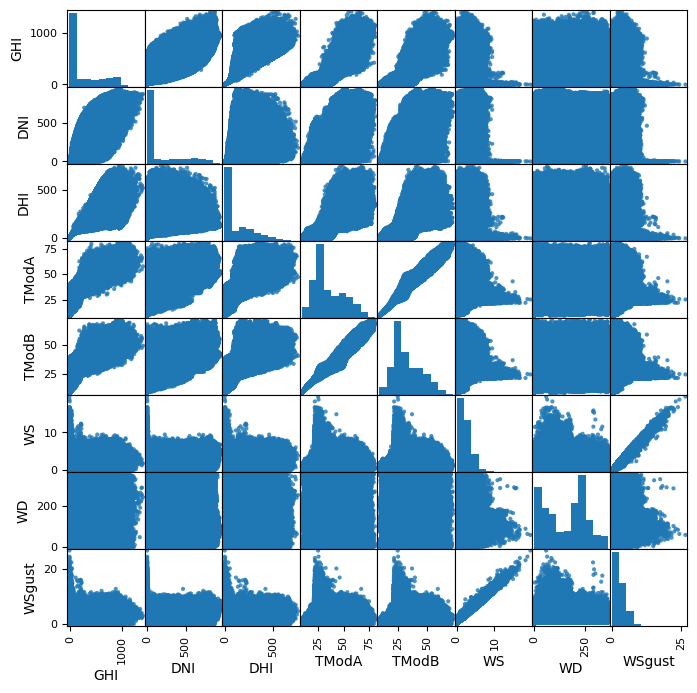

In [ ]:
# Correlation analysis for Benin dataset
scatter_matrix(benin_df[rad_components + wind_conditions], alpha=0.8, figsize=(12, 12), diagonal='hist')
plt.show()

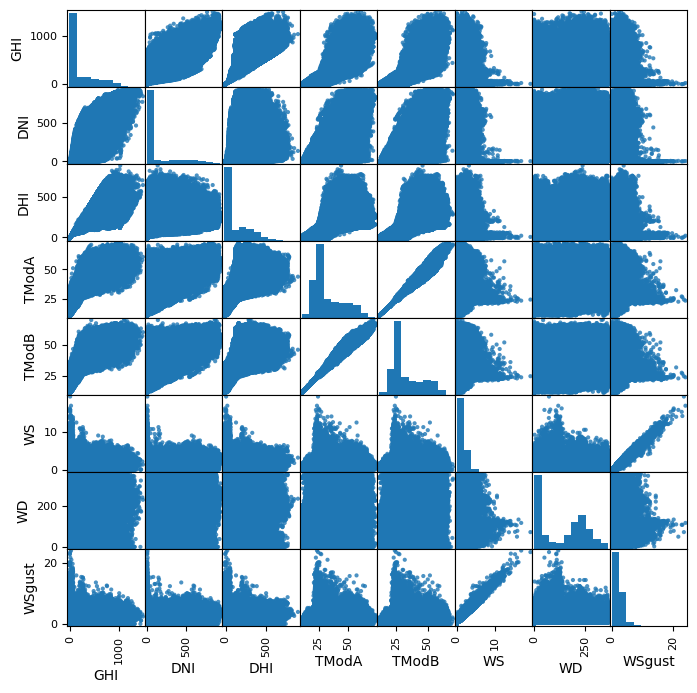

In [23]:
# Correlation analysis for Sierra Leone dataset
scatter_matrix(sierraleone_df[rad_components + wind_conditions], alpha=0.8, figsize=(12, 12), diagonal='hist')
plt.show()

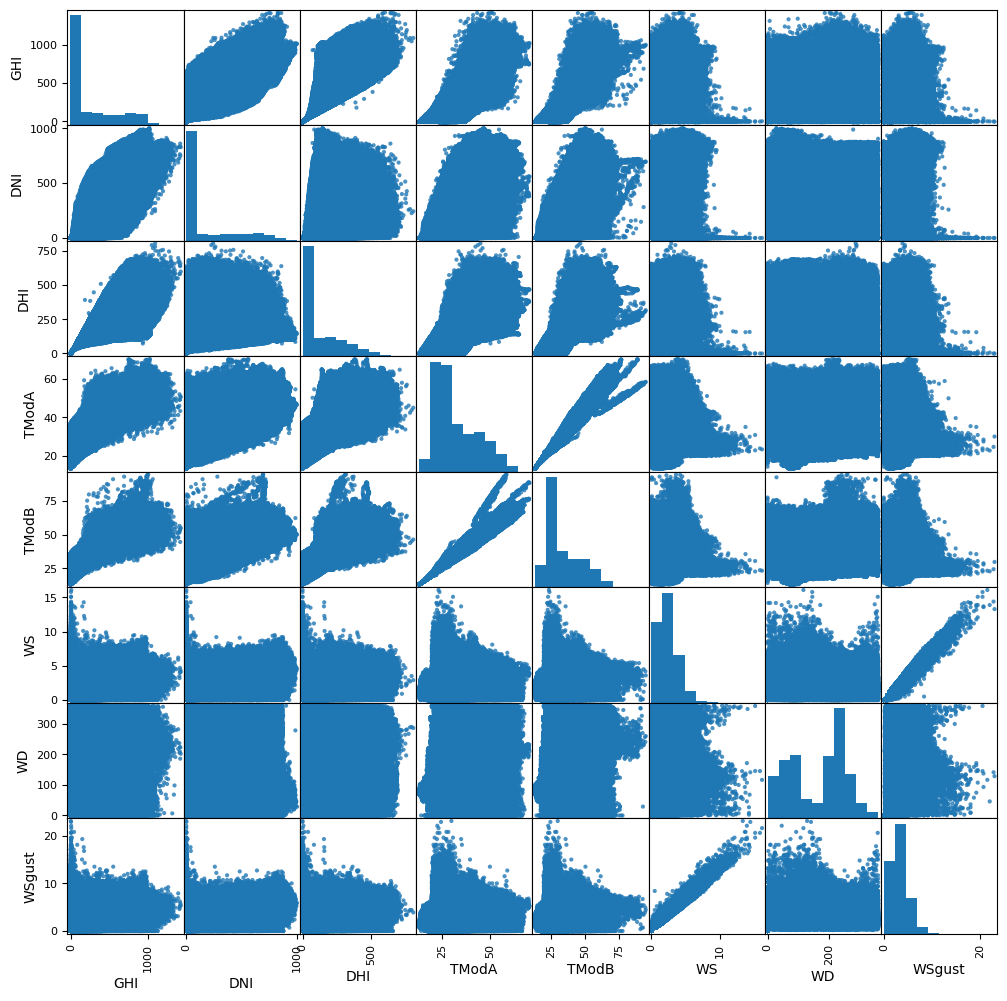

In [24]:
# Correlation analysis for Togo dataset
scatter_matrix(togo_df[rad_components + wind_conditions], alpha=0.8, figsize=(12, 12), diagonal='hist')
plt.show()